<a href="https://colab.research.google.com/github/Manisha2297/RestroRecommender/blob/main/Viz_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#mount your own drive to avoid downloading the data multiple time 

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df_restaurant = pd.read_pickle('/content/gdrive/MyDrive/YelpDataset/PickleFiles/restuarant_df')

In [ ]:
df_restaurant.state.nunique()

11

In [ ]:
df_restaurant.state.unique()

array(['IL', 'WI', 'NC', 'ON', 'QC', 'AZ', 'OH', 'PA', 'AB', 'NV', 'SC'],
      dtype=object)

In [ ]:
cat_cuisines = ['thai','chinese','japanese','korean','indian','american','caribbean','italian','mediterranean',
  'mexican','vietnamese','cajun','greek']

[Text(0, 0.5, 'Number of Restaurants')]

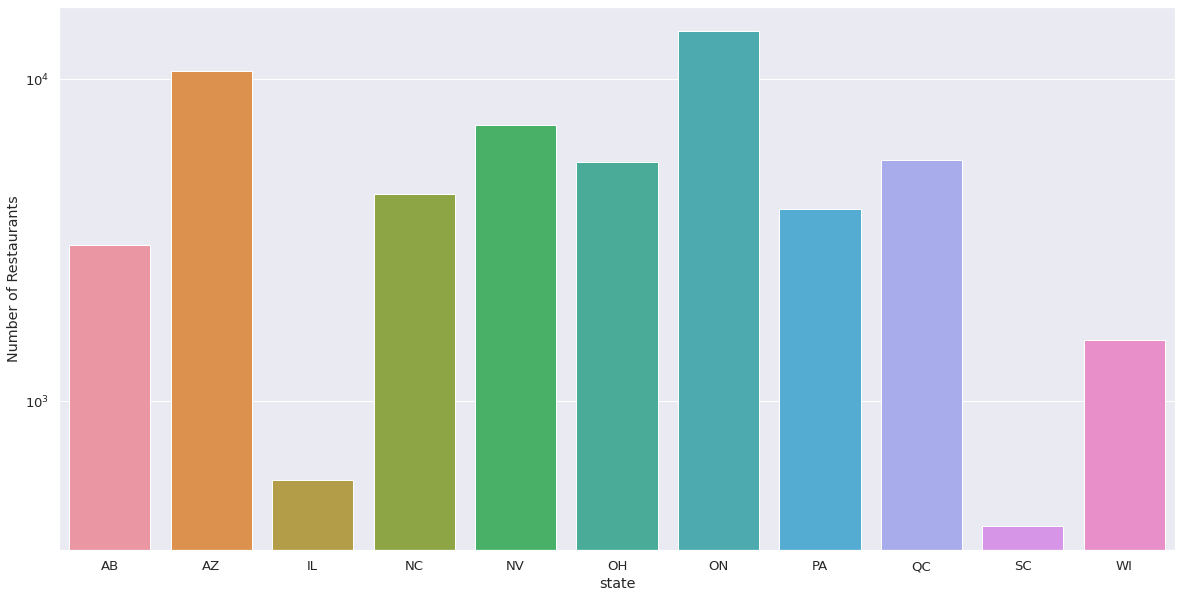

In [ ]:
plt.figure(figsize= (20,10))
df_res_per_state =  df_restaurant.groupby(['state'])['business_id'].count().reset_index()

ax = sns.barplot(x='state', y = 'business_id', data= df_res_per_state,log=True)
ax.set(ylabel= 'Number of Restaurants')

[Text(0, 0.5, 'Number of Restaurants')]

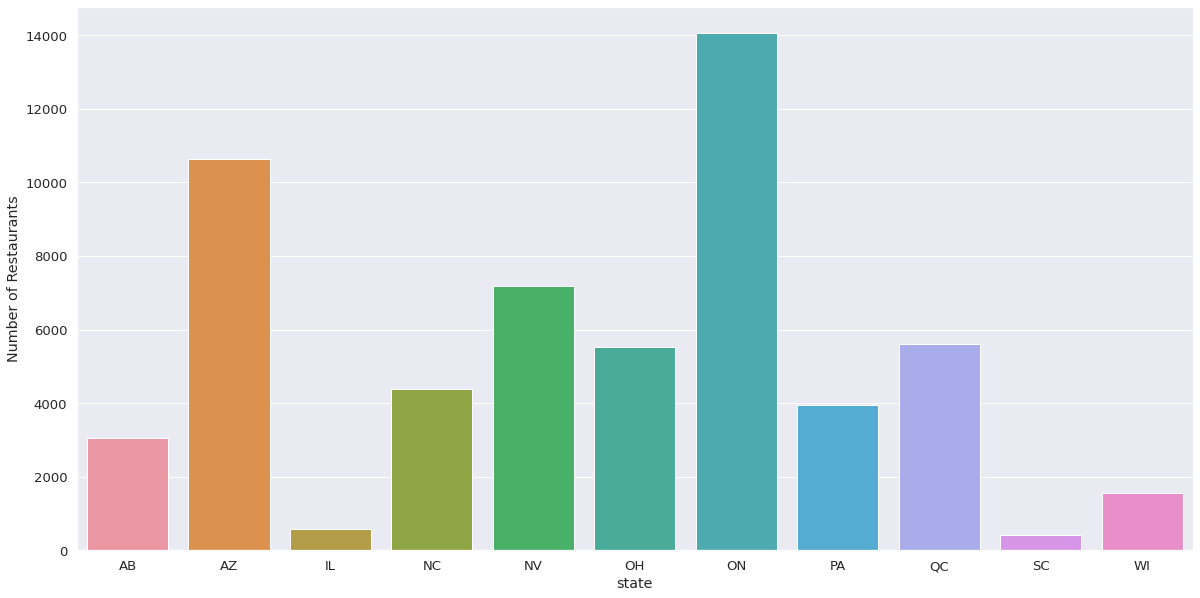

In [ ]:
plt.figure(figsize= (20,10))
df_res_per_state =  df_restaurant.groupby(['state'])['business_id'].count().reset_index()

ax = sns.barplot(x='state', y = 'business_id', data= df_res_per_state)
ax.set(ylabel= 'Number of Restaurants')

In [ ]:
df_res_per_state

,state,business_id
0,AB,3051
1,AZ,10622
2,IL,568
3,NC,4386
4,NV,7176
5,OH,5515
6,ON,14069
7,PA,3947
8,QC,5613
9,SC,409


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


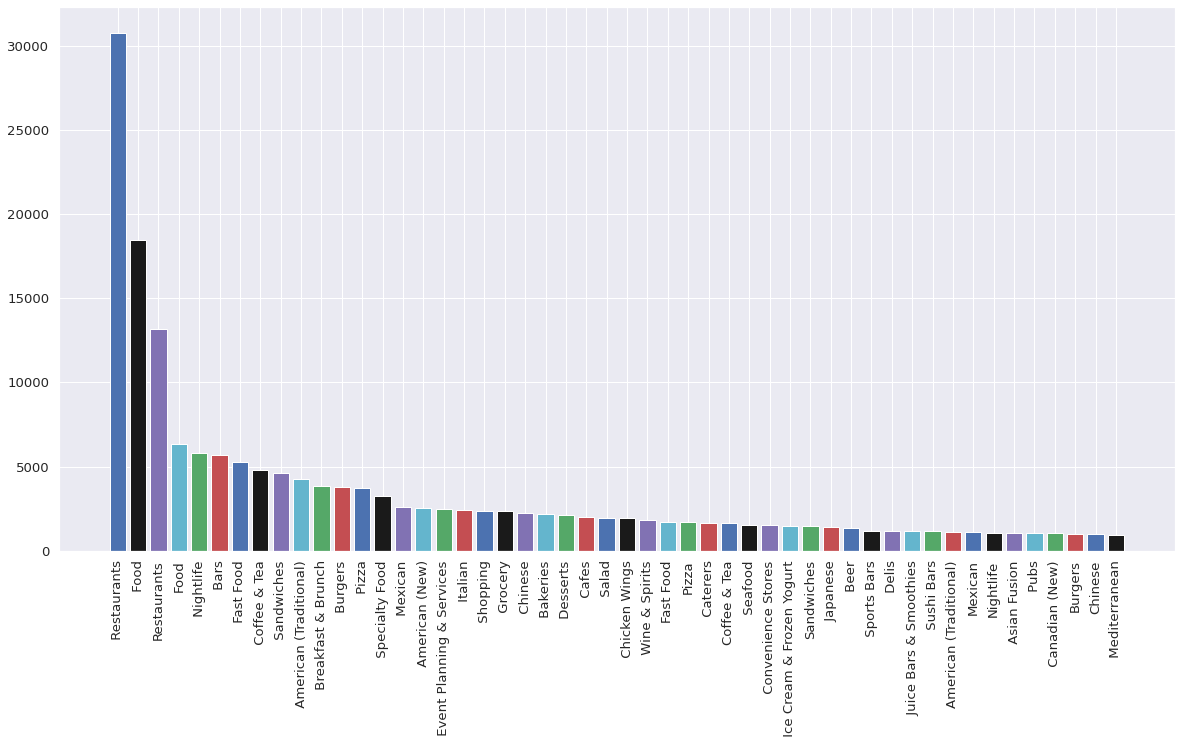

In [ ]:
Categories = {}

for x in df_restaurant.categories:# Not needed
   
   all_categories = x.split(',') # not needed - provide list of cusines
   for cat in all_categories: 
     if cat not in Categories:
       Categories[cat]=1
     else:
       Categories[cat] +=1

All_categories = list(Categories.keys())    
Cat_list = [[x, Categories[x]] for x in All_categories]

# print(sorted(Cat_list, key = lambda x: x[1], reverse = True))

Cat_list = sorted(Cat_list, key = lambda x: x[1], reverse = True)   

top_50 = Cat_list[:50]

plt.figure(figsize= (20,10))
plt.bar(range(len(top_50)), [x[1] for x in top_50],align = 'center',color ='bkmcgr' )
plt.xticks(range(len(top_50)), [x[0] for x in top_50], rotation = 'vertical')
plt.show();

In [ ]:
# def get_restaurantdf(resturant_keywords, df,final_df):
#   for index, row in df.iterrows():
#     if any(key_word in row['categories'] for key_word in resturant_keywords):
#       final_df= pd.concat([final_df,row])
#   return final_df

In [ ]:
cusines_keywords = ['Thai','Chinese','Japanese','Korean','Indian','American','Caribbean','Italian','Mediterranean',
      'Mexican','Vietnamese','Cajun','Greek']

In [ ]:

def get_restaurantdf(resturant_keywords, df,restuarant_df):
  for index, row in df.iterrows():
    if any(key_word in row['categories'] for key_word in resturant_keywords):
      restuarant_df= pd.concat([restuarant_df,row])
  return restuarant_df

    



In [ ]:
df_restaurant.state.nunique()

11

In [ ]:
df_cusines = get_restaurantdf(cusines_keywords, df_restaurant, pd.DataFrame())

In [ ]:
df_cusines.state.nunique()

11

In [ ]:
row_size = int(len(df_cusines)/14)
df_cusines = pd.DataFrame(df_cusines.values.reshape((row_size,14)), columns=df_restaurant.columns)

ValueError: ignored

In [ ]:
df_cusines.state.nunique()

11

In [ ]:
# df_cusines.to_pickle('/content/gdrive/MyDrive/YelpDataset/PickleFiles/df_cusines')

In [ ]:
df_cusines_explode = df_cusines.copy()

In [ ]:
df_cusines_explode['categories'] = df_cusines_explode['categories'].apply(lambda x: x.split(','))
df_cusines_explode = df_cusines_explode.explode('categories')

In [ ]:
df_cusines_explode.state.nunique()

11

In [ ]:
df_cusines_explode.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,Japanese,Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON
0,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,Fast Food,Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON
0,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,Food Court,Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON
0,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,Restaurants,Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON
1,"1541 E 38th St, Ste 101","{'BusinessParking': 'None', 'Ambience': ""{'tou...",98hyK2QEUeI8v2y0AghfZA,Restaurants,Cleveland,"{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",1,41.5122,-81.6633,Pho Lee's Vietnamese Restaurant,44114,23,4.5,OH


In [ ]:
df_cusines_only = get_restaurantdf(cusines_keywords, df_cusines_explode, pd.DataFrame())

In [ ]:
row_size = int(len(df_cusines_only)/14)
df_cusines_only= pd.DataFrame(df_cusines_only.values.reshape((row_size,14)), columns=df_restaurant.columns)

In [ ]:
row_size = int(len(df_cusines_only)/14)
df_cusines_only = pd.DataFrame(df_cusines_only.values.reshape((row_size,14)), columns=df_restaurant.columns)

In [ ]:
df_cusines_only.to_pickle('/content/gdrive/MyDrive/YelpDataset/PickleFiles/df_cusines_only')

In [ ]:
df_cusines_only.head()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,Japanese,Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON
1,"1541 E 38th St, Ste 101","{'BusinessParking': 'None', 'Ambience': ""{'tou...",98hyK2QEUeI8v2y0AghfZA,Vietnamese,Cleveland,"{'Monday': '11:0-20:0', 'Wednesday': '11:0-20:...",1,41.5122,-81.6633,Pho Lee's Vietnamese Restaurant,44114,23,4.5,OH
2,688 Gerrard Street E,"{'RestaurantsTakeOut': 'True', 'Alcohol': ""u'b...",0QjROMVW9ACKjhSEfHqNCQ,Vietnamese,Toronto,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,43.6664,-79.3488,Mi Mi Restaurant,M4M 1Y3,116,4,ON
3,515 4th Avenue SW,"{'RestaurantsReservations': 'True', 'WiFi': ""u...",RrapAhd8ZxCj-iue7fu9FA,Indian,Calgary,"{'Monday': '17:0-22:0', 'Tuesday': '17:0-22:0'...",1,51.0494,-114.073,Ganga Restaurant,T2P 0J8,3,1.5,AB
4,16726 Pearl Rd,"{'BusinessAcceptsCreditCards': 'True', 'Ambien...",7j0kor_fkeYhyEpXh4OpnQ,American (Traditional),Strongsville,"{'Monday': '6:30-15:0', 'Tuesday': '6:30-15:0'...",1,41.2957,-81.8357,Scramblers - Strongsville,44136,81,3.5,OH


In [ ]:
df_cusines_only = pd.read_pickle('/content/gdrive/MyDrive/YelpDataset/PickleFiles/df_cusines_only')

In [ ]:
df_cusines_only['state'].nunique()

11

In [ ]:
cusines_keywords = ['Thai','Chinese','Japanese','Korean','Indian','American','Caribbean','Italian','Mediterranean',
      'Mexican','Vietnamese','Cajun','Greek']

In [ ]:
df_cusines_only['categories'].unique()

array(['Japanese', ' Vietnamese', 'Vietnamese', ' Indian',
       ' American (Traditional)', ' Thai', ' Italian', 'Mexican',
       ' Chinese', 'Indian', ' American (New)', ' Japanese',
       'American (Traditional)', ' Mexican', 'Chinese', 'American (New)',
       'Mediterranean', 'Italian', ' Korean', 'Thai', 'Greek',
       ' Mediterranean', ' Greek', 'Korean', ' Caribbean', 'Caribbean',
       ' Cajun/Creole', ' Latin American', 'Cajun/Creole',
       'Latin American', ' New Mexican Cuisine', ' Japanese Curry',
       'New Mexican Cuisine', ' Traditional Chinese Medicine',
       'Japanese Curry', 'Traditional Chinese Medicine'], dtype=object)

In [ ]:
df_cusines_per_state = df_cusines_only.groupby(['state','categories']).count()['business_id'].reset_index()

In [ ]:
df_cusines_per_state.to_pickle('/content/gdrive/MyDrive/YelpDataset/PickleFiles/df_cusines_per_state')

In [ ]:
df_cusines_per_state.state.nunique()

11

In [ ]:
len(df_restaurant[df_restaurant['state']=='CA'])

3

In [ ]:
df_cusines_per_state[df_cusines_per_state['state'] == 'CA']

,state,categories,business_id
64,CA,Italian,1


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


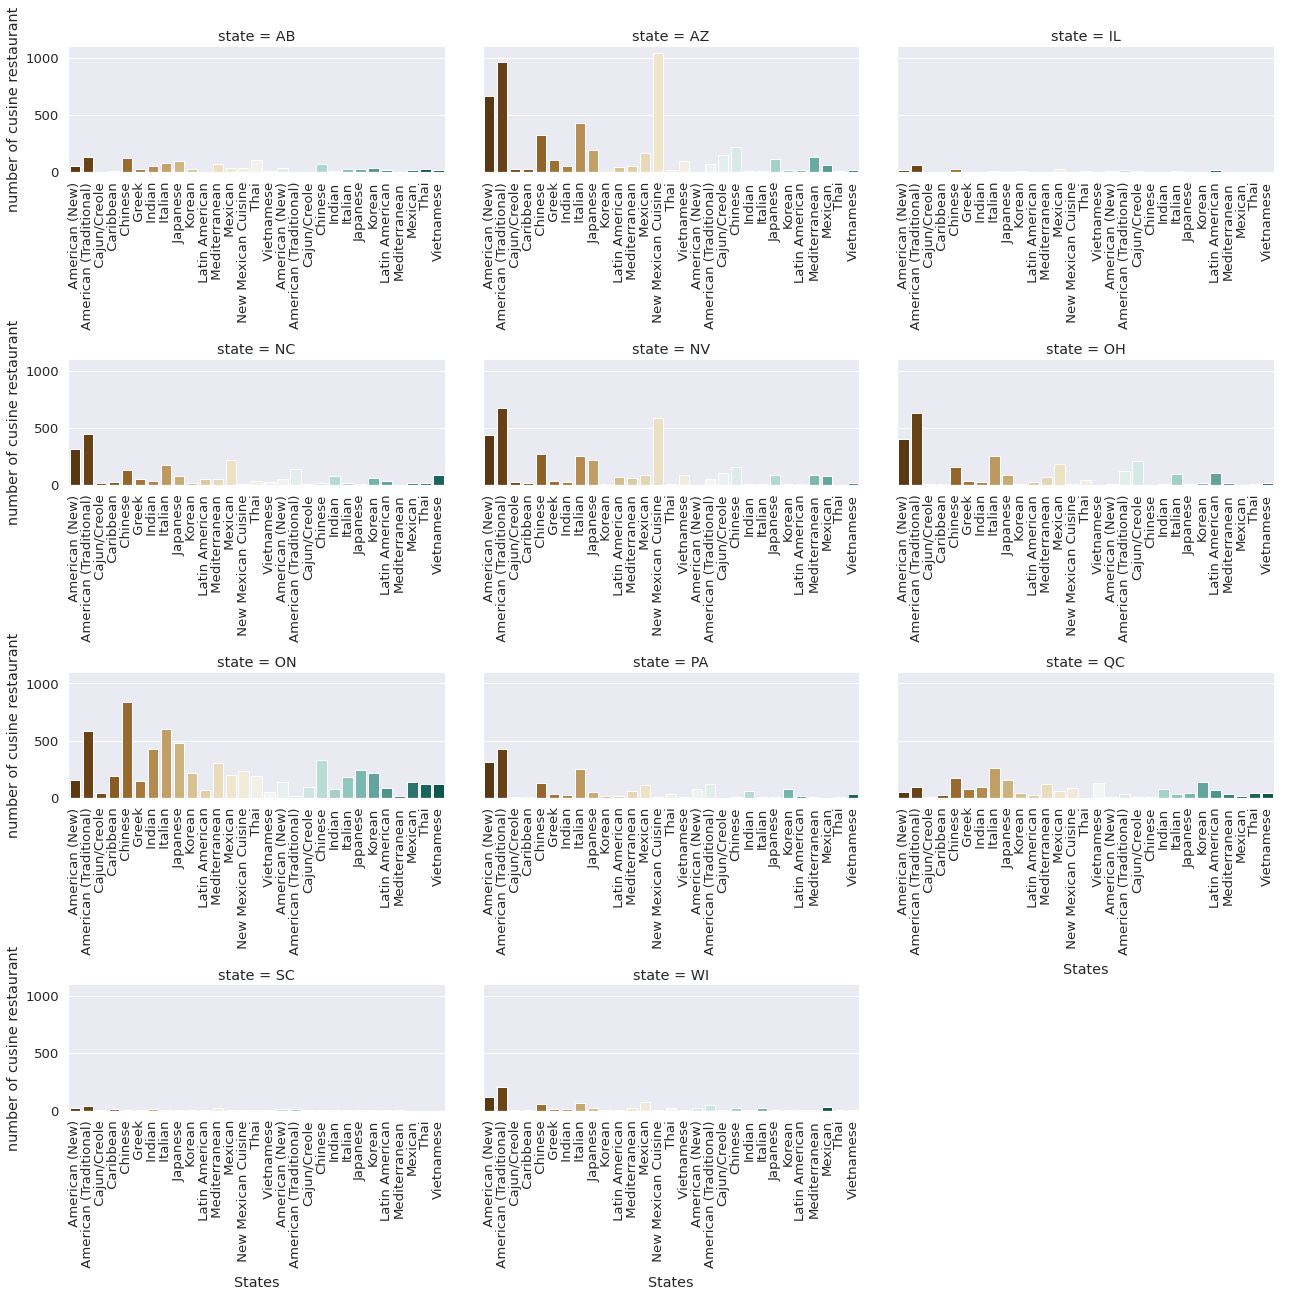

In [ ]:
sns.set_style("darkgrid", {'axes.grid': True})
sns.set_context("poster")
sns.set(font_scale = 1.2)


g = sns.FacetGrid(df_cusines_per_state, col='state', col_wrap=3,margin_titles=True, size=4,aspect=1.5)
g.map(sns.barplot,'categories','business_id',palette="BrBG")
g.add_legend()
g.set_xticklabels(rotation=90)
plt.subplots_adjust(hspace=1.5, wspace=0.1)

for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation= 90 , labelbottom=True)
    
# g.set(xticks=[i for i in df_cusines_per_state.categories.unique()])
# plt.xticks(range(0,len(x_label)), x_label)

# Modify the details of the matplotlib Axes g
#g.despine(left=True)
g.set_ylabels('number of cusine restaurant')
g.set_xlabels('States')

In [ ]:
type_of_food_keywords = ['Fast Food', 'Cafe','Bar','Pub','Buffet', 'Vegetarian', 'Barbeque','Steakhouse','Salad', 'Sushi']

In [ ]:
df_type_of_food = get_restaurantdf(type_of_food_keywords, df_restaurant, pd.DataFrame())

In [ ]:
row_size = int(len(df_type_of_food)/14)
df_type_of_food = pd.DataFrame(df_type_of_food.values.reshape((row_size,14)), columns=df_restaurant.columns)

ValueError: ignored

In [ ]:
df_type_of_food.state.nunique()

11

In [ ]:
df_type_of_food.shape

(22560, 14)

In [ ]:
df_food_explode_c = df_type_of_food.copy()

In [ ]:
df_food_explode_c['categories']

0             Japanese, Fast Food, Food Court, Restaurants
1         Food, Pretzels, Bakeries, Fast Food, Restaurants
2                          Restaurants, Fast Food, Burgers
3        Shopping Centers, Food, Coffee & Tea, Cafes, M...
4                      Restaurants, Buffets, Indian, Halal
                               ...                        
22567    Juice Bars & Smoothies, Mediterranean, Restaur...
22568    Ice Cream & Frozen Yogurt, Burgers, Restaurant...
22569    Nightlife, American (Traditional), Chicken Win...
22570    Restaurants, Pizza, Sandwiches, Fast Food, Chi...
22571    American (New), Food, Burgers, Restaurants, Fa...
Name: categories, Length: 22572, dtype: object

In [ ]:
df_food_explode_c['categories'] = df_food_explode_c['categories'].apply(lambda x: x.split(','))
df_food_explode = df_food_explode_c.explode('categories')

In [ ]:
df_food_explode.head(3)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,Japanese,Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON
0,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,Fast Food,Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON
0,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,Food Court,Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON


In [ ]:
df_type_of_food_only= get_restaurantdf(type_of_food_keywords, df_food_explode, pd.DataFrame())

In [ ]:
row_size = int(len(df_type_of_food_only)/14)
df_type_of_food_only = pd.DataFrame(df_type_of_food_only.values.reshape((row_size,14)), columns=df_restaurant.columns)

In [ ]:
df_type_of_food_only.shape()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,300 John Street,"{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",lu7vtrp_bE9PnxWfA8g4Pg,Fast Food,Thornhill,NaN,1,43.8205,-79.3985,Banzai Sushi,L3T 5W4,7,4.5,ON
1,"4550 East Cactus Rd, #KSFC-4","{'GoodForKids': 'True', 'RestaurantsTakeOut': ...",vjTVxnsQEZ34XjYNS-XUpA,Fast Food,Phoenix,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",1,33.6028,-111.984,Wetzel's Pretzels,85032,10,4,AZ
2,4602 Northfield Road,"{'RestaurantsDelivery': 'False', 'BusinessAcce...",tLpkSwdtqqoXwU0JAGnApw,Fast Food,Cleveland,"{'Monday': '10:0-3:0', 'Tuesday': '10:0-3:0', ...",1,41.4346,-81.527,Wendy's,44128,7,3.5,OH


In [ ]:
df_type_of_food_per_state = df_type_of_food_only.groupby(['state','categories']).count()['business_id'].reset_index()

In [ ]:
df_type_of_food_only['categories'].unique()

array([' Fast Food', ' Cafes', ' Buffets', ' Salad', 'Fast Food',
       ' Internet Cafes', 'Dive Bars', ' Bars', 'Cafes', 'Steakhouses',
       ' Steakhouses', ' Sushi Bars', ' Sports Bars', 'Barbeque',
       ' Juice Bars & Smoothies', ' Barbeque', ' Vegetarian',
       ' Themed Cafes', ' Tapas Bars', ' Cocktail Bars', ' Wine Bars',
       'Salad', ' Pubs', 'Sports Bars', ' Hookah Bars', 'Sushi Bars',
       'Pubs', ' Beer Bar', 'Cocktail Bars', 'Bars', 'Hookah Bars',
       'Juice Bars & Smoothies', ' Dive Bars', ' Conveyor Belt Sushi',
       'Whiskey Bars', ' Irish Pub', 'Wine Bars', 'Vegetarian',
       ' Cafeteria', ' Bartenders', 'Tapas Bars', ' Hong Kong Style Cafe',
       'Buffets', ' Beach Bars', ' Piano Bars', 'Beer Bar',
       ' Whiskey Bars', ' Public Markets', ' Gay Bars', 'Internet Cafes',
       ' Public Services & Government', 'Hong Kong Style Cafe',
       'Themed Cafes', 'Irish Pub', 'Piano Bars', ' Champagne Bars',
       ' Tiki Bars', 'Public Services & Governme

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


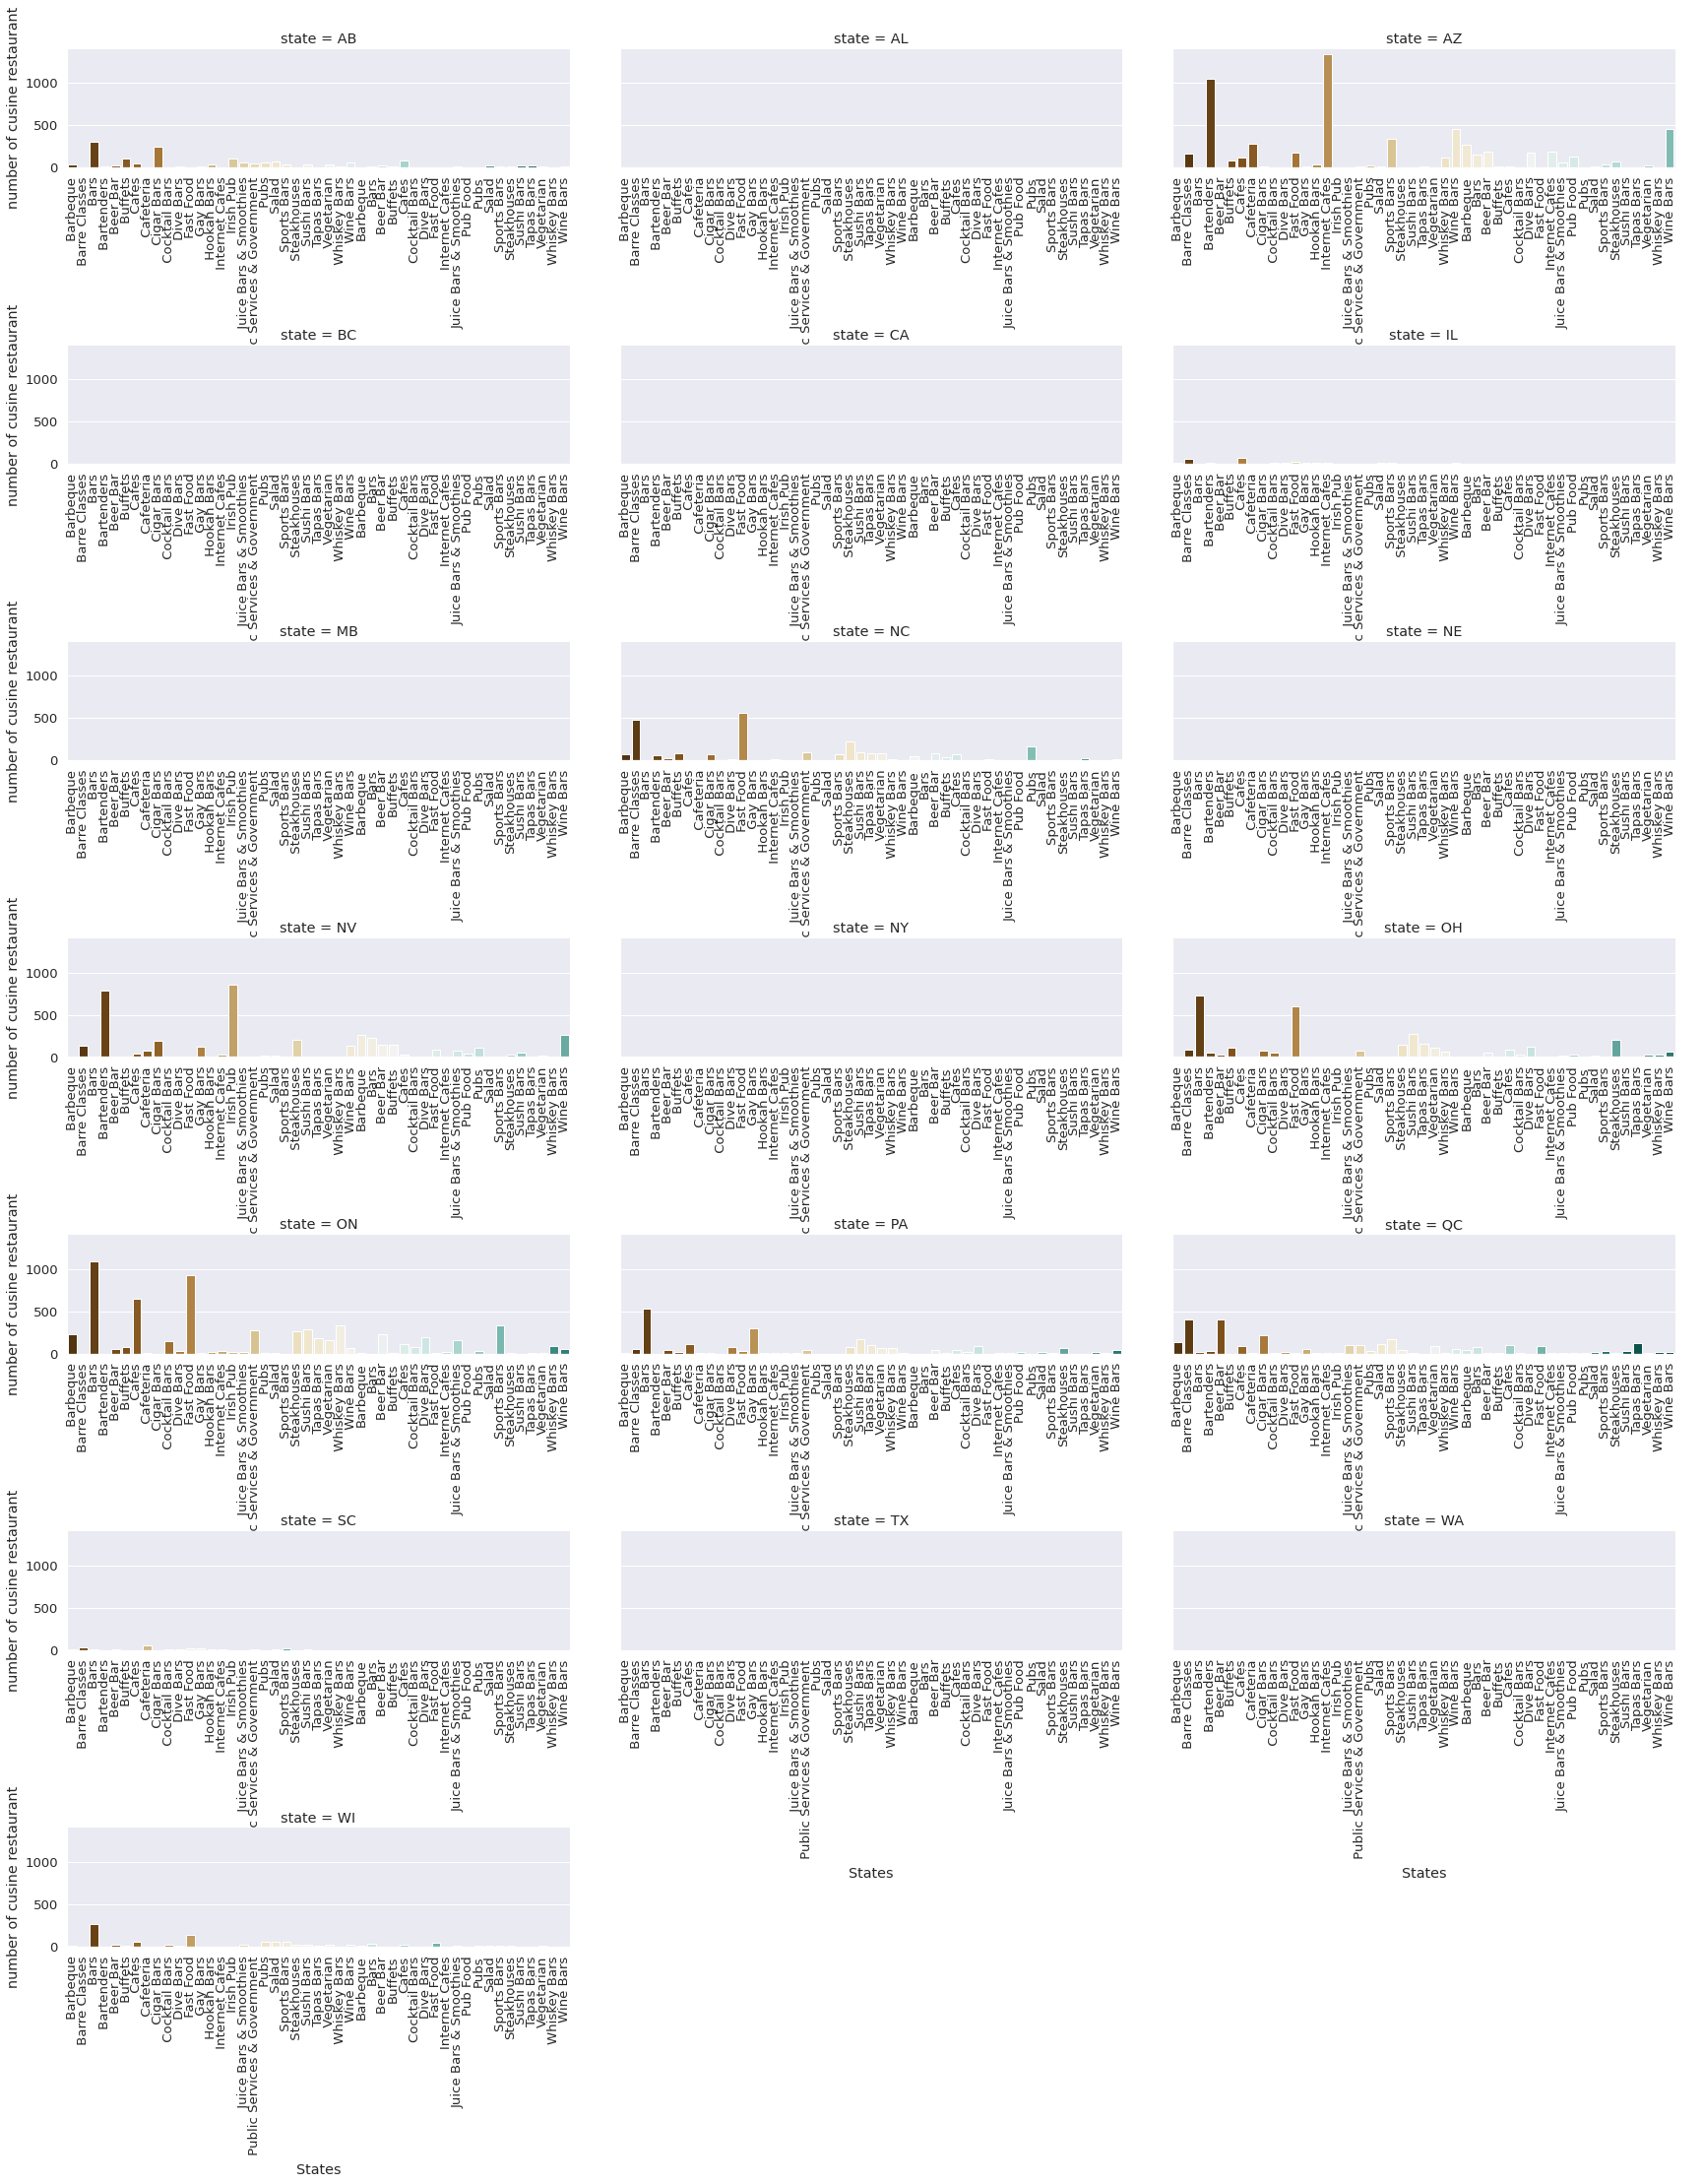

In [ ]:
sns.set_style("darkgrid", {'axes.grid': True})
sns.set_context("poster")
sns.set(font_scale = 1.2)


g = sns.FacetGrid(df_type_of_food_per_state , col='state', col_wrap=3,margin_titles=True, size=4,aspect=2)
g.map(sns.barplot,'categories','business_id',palette="BrBG")
g.add_legend()
g.set_xticklabels(rotation=90)
plt.subplots_adjust(hspace=1.5, wspace=0.1)

for ax in g.axes.flatten():
    ax.tick_params(axis='x', labelrotation= 90 , labelbottom=True)
    
# g.set(xticks=[i for i in df_cusines_per_state.categories.unique()])
# plt.xticks(range(0,len(x_label)), x_label)

# Modify the details of the matplotlib Axes g
#g.despine(left=True)
g.set_ylabels('number of cusine restaurant')
g.set_xlabels('States')